In [1]:
from point import Point
from squareLattice import SquareLattice
from simulator import Simulator
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lattice_big = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 432892.31it/s]


In [3]:
simulator_big = Simulator(lattice_big)

100%|██████████| 15625/15625 [00:00<00:00, 325335.95it/s]


In [4]:
stats = simulator_big.step(100000, 20000)

100%|██████████| 100000/100000 [15:17<00:00, 108.99it/s]


In [5]:
ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = stats

In [6]:
ret

[8173, 6392, 1530, 128, 125, 0]

In [7]:
sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2)

(14141.0535, 62.9465, 1405.50485, 15.3149875, 0.1801625)

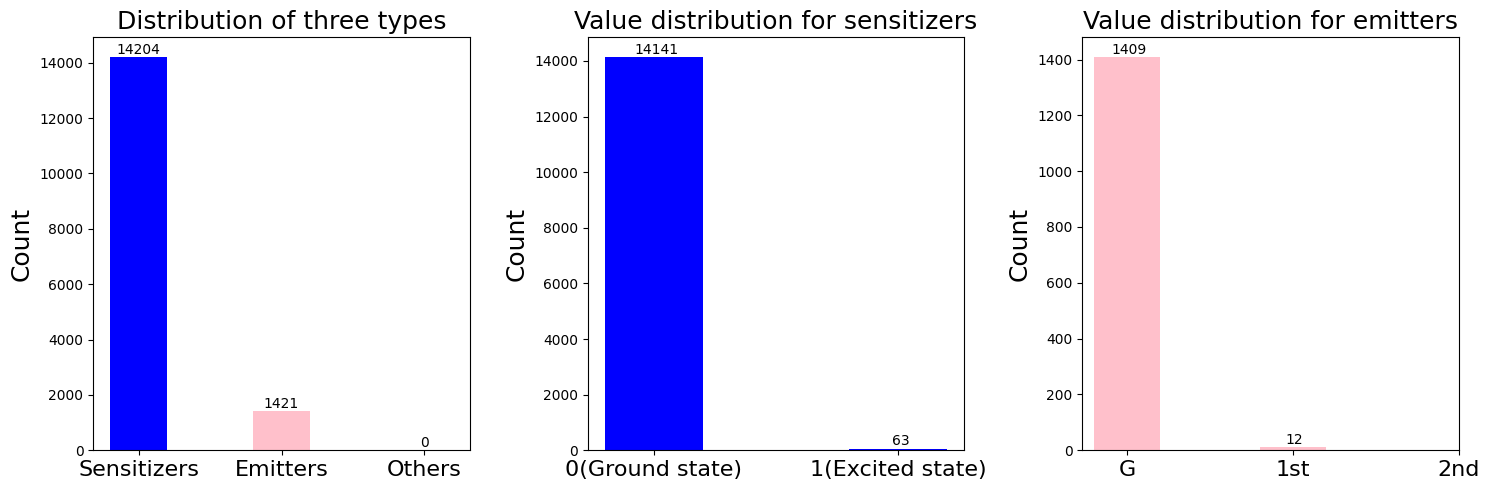

In [8]:
simulator_big.lattice.plot_distributions()

In [12]:
lattice_big = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 557985.88it/s]


In [13]:
simulator_big = Simulator(lattice_big)

100%|██████████| 15625/15625 [00:00<00:00, 557819.66it/s]


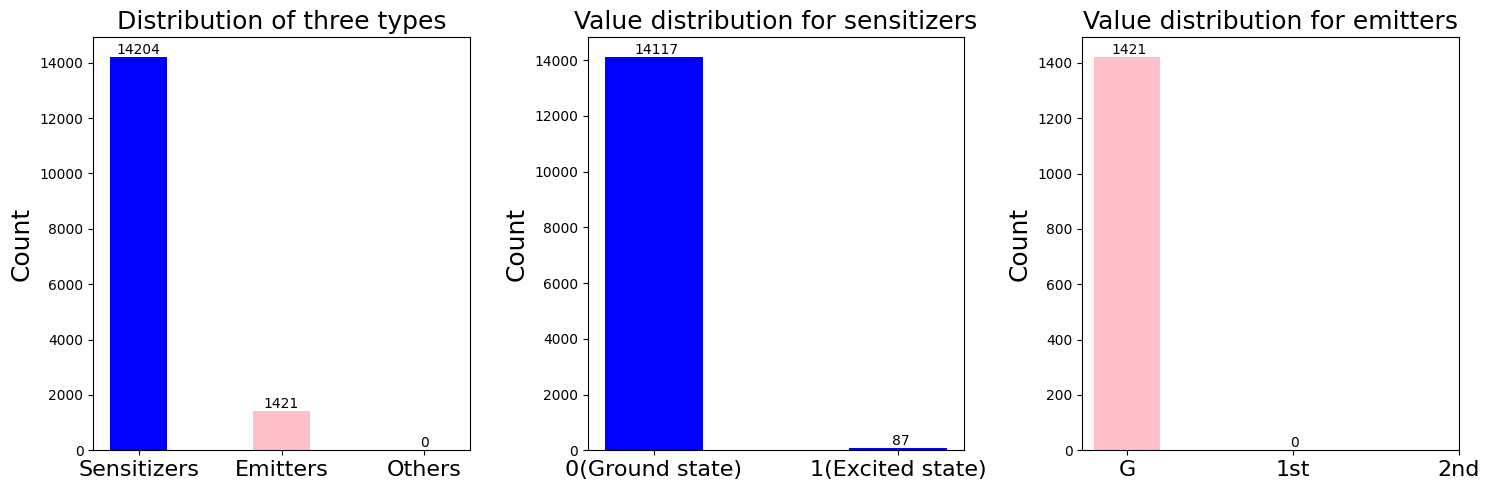

In [14]:
simulator_big.plot_distributions()

In [15]:
simulator_big.step(100, 0)

100%|██████████| 100/100 [00:00<00:00, 149.04it/s]


([6, 0, 0, 0, 0], [14202.99, 1.01, 1421.0, 0.0, 0.0])

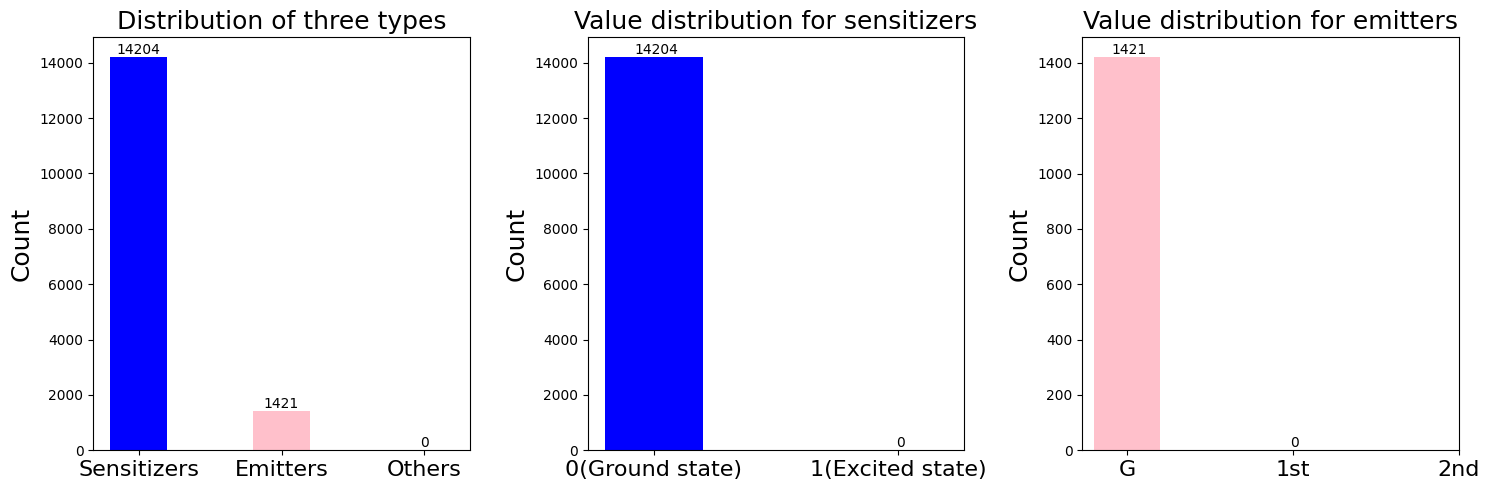

In [16]:
simulator_big.plot_distributions()

In [17]:
simulator_big.t

100